In [ ]:
#textblob
#VADER
#flair


In [ ]:
from textblob import TextBlob
testimonial = TextBlob('The food was great')

In [ ]:
testimonial.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [ ]:
testimonial = TextBlob('The food was very bad')
testimonial.sentiment

Sentiment(polarity=-0.9099999999999998, subjectivity=0.8666666666666667)

In [ ]:
testimonial = TextBlob('The food was okay')
testimonial.sentiment

Sentiment(polarity=0.5, subjectivity=0.5)

In [ ]:
import pandas as pd
df = pd.read_csv('sentiment_analysis_data.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
df.shape

(5842, 2)

In [ ]:
X = df.iloc[:,0]
y = df.iloc[:,1]

In [ ]:
X

,Sentence
0,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,"For the last quarter of 2010 , Componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...
4,The Swedish buyout firm has sold its remaining...
...,...
5837,RISING costs have forced packaging producer Hu...
5838,Nordic Walking was first used as a summer trai...
5839,"According shipping company Viking Line , the E..."
5840,"In the building and home improvement trade , s..."


In [ ]:
y.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
df.isnull().sum()

,0
Sentence,0
Sentiment,0


<Axes: xlabel='Sentiment', ylabel='count'>

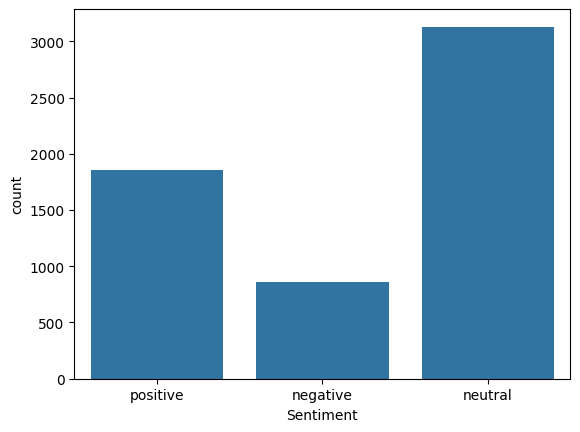

In [ ]:
import seaborn as sns
sns.countplot(x = y)

In [ ]:
positive_data = df[df['Sentiment']=='positive']

In [ ]:
positive_data['Sentence']

,Sentence
0,The GeoSolutions technology will leverage Bene...
2,"For the last quarter of 2010 , Componenta 's n..."
5,$SPY wouldn't be surprised to see a green close
8,Kone 's net sales rose by some 14 % year-on-ye...
10,Circulation revenue has increased by 5 % in Fi...
...,...
5819,Last month we added to our $GILD position and ...
5824,`` In the newly formed company YIT Stavo the l...
5825,Friends Life lifts profits 38% and hikes divi ...
5836,Daily Mail parent company in talks with potent...


In [ ]:
str(positive_data['Sentence'])

"0       The GeoSolutions technology will leverage Bene...\n2       For the last quarter of 2010 , Componenta 's n...\n5         $SPY wouldn't be surprised to see a green close\n8       Kone 's net sales rose by some 14 % year-on-ye...\n10      Circulation revenue has increased by 5 % in Fi...\n                              ...                        \n5819    Last month we added to our $GILD position and ...\n5824    `` In the newly formed company YIT Stavo the l...\n5825    Friends Life lifts profits 38% and hikes divi ...\n5836    Daily Mail parent company in talks with potent...\n5841    HELSINKI AFX - KCI Konecranes said it has won ...\nName: Sentence, Length: 1852, dtype: object"

In [ ]:
from wordcloud import WordCloud
wc = WordCloud().generate(str(positive_data['Sentence']))


(-0.5, 399.5, 199.5, -0.5)

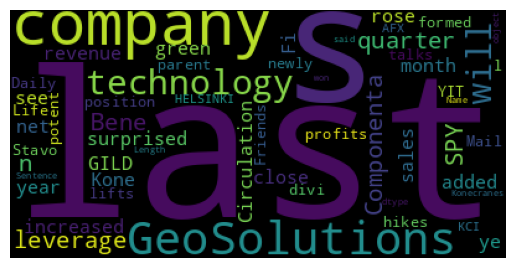

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(wc);
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

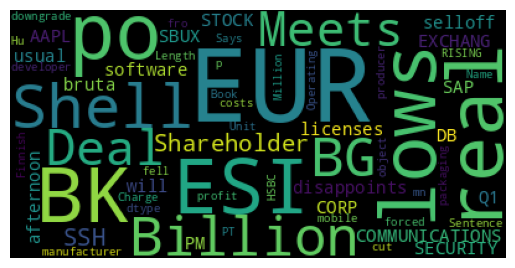

In [ ]:
negative_data = df[df['Sentiment']=='negative']
wc = WordCloud().generate(str(negative_data['Sentence']))
plt.imshow(wc);
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

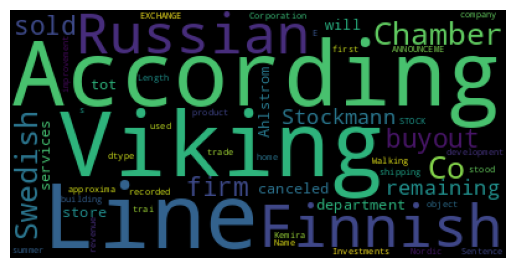

In [ ]:

neutral_data = df[df['Sentiment']=='neutral']
wc = WordCloud().generate(str(neutral_data['Sentence']))
plt.imshow(wc);
plt.axis('off')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

In [ ]:
X.shape

(5842, 11381)

In [ ]:
vocabulary = cv.vocabulary_
vocabulary

{'the': 10214,
 'geosolutions': 4667,
 'technology': 10115,
 'will': 11134,
 'leverage': 6137,
 'benefon': 1689,
 'gps': 4762,
 'solutions': 9505,
 'by': 2054,
 'providing': 8128,
 'location': 6263,
 'based': 1597,
 'search': 9077,
 'communities': 2540,
 'platform': 7791,
 'relevant': 8504,
 'multimedia': 6901,
 'content': 2710,
 'and': 1211,
 'new': 7032,
 'powerful': 7919,
 'commercial': 2518,
 'model': 6782,
 'esi': 3770,
 'on': 7280,
 'lows': 6329,
 'down': 3368,
 '50': 532,
 'to': 10334,
 'bk': 1770,
 'real': 8350,
 'possibility': 7893,
 'for': 4428,
 'last': 6033,
 'quarter': 8218,
 'of': 7229,
 '2010': 255,
 'componenta': 2599,
 'net': 7017,
 'sales': 8929,
 'doubled': 3362,
 'eur131m': 3829,
 'from': 4524,
 'eur76m': 3947,
 'same': 8943,
 'period': 7650,
 'year': 11273,
 'earlier': 3483,
 'while': 11108,
 'it': 5606,
 'moved': 6869,
 'zero': 11325,
 'pre': 7937,
 'tax': 10090,
 'profit': 8053,
 'loss': 6309,
 'eur7m': 3948,
 'according': 886,
 'finnish': 4326,
 'russian': 8867,

In [ ]:
vocabulary['netflix']

7023

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 5)

In [ ]:
positive_data_test = y_test == 'positive'

In [ ]:
num_positive = sum(positive_data_test)
num_positive

472

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)
score = model.score(X_train,y_train)
score

0.8450125542113672

In [ ]:
test_score = model.score(X_test,y_test)
test_score

0.70362765229295

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 81,  88,  49],
       [ 71, 641,  59],
       [ 21, 145, 306]])

In [ ]:
classes = y.unique()
classes

array(['positive', 'negative', 'neutral'], dtype=object)

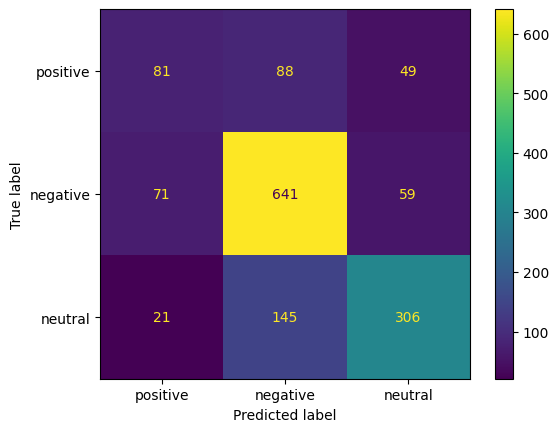

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = classes)
disp.plot()

In [ ]:
sentence = 'The compnay XYZ did not perform well in the first quarter. Its sales have been declining.'
sentence = cv.transform([sentence])
sentence

<1x11381 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [ ]:
model.predict(sentence)

array(['neutral'], dtype='<U8')

In [ ]:
sentence2 = 'The growth rate of the company has been positive. Its shares price is also increasing. Customers like the companys policies'
sentence2 = cv.transform([sentence2])
model.predict(sentence2)

array(['neutral'], dtype='<U8')